In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
#!pip install matplotlib

In [3]:
print(tf.__version__)

2.1.0


In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
fashion_mnist

<module 'tensorflow_core.python.keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\Ashitha A Nair\\.conda\\envs\\tensorflow\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [6]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

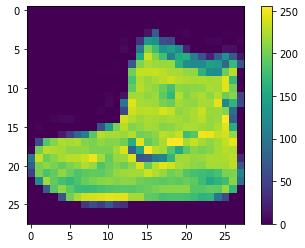

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
#scale the image values from 0to 1 before feeding into the neural network, we can do this by diiving by 255
train_images=train_images/255.0
test_images=test_images/255.0

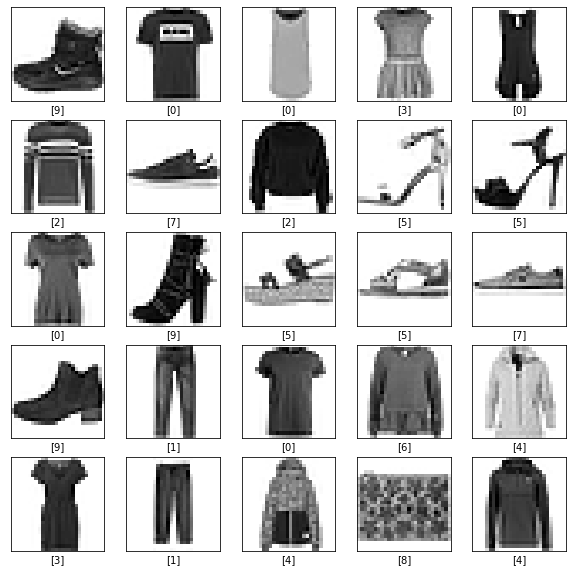

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

In [14]:
#lets give class names for the above images as its showing us numbers
#as the labels have been already given according to the index numebrs in the mnist clothing dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

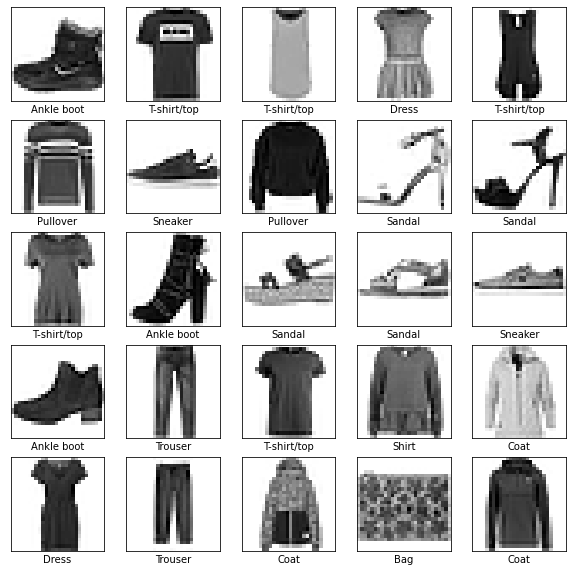

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the Model

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #convertimg thr 2D image of 28*28 to 784 pixels that is OneDimensional
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)])

In [23]:
model

## compile the model

In [24]:
#the model compilation involes
#loss function
#optimizer
#metrics

In [28]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

## Training the model

In [29]:
#we train the model using the train_images and train_labels using model.fit
#We make predictions on the test_images

In [30]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5002 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3780 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3387 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3140 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2957 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2798 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2692 - accuracy: 0.9013
Epoch 8/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2611 - accuracy: 0.9023
Epoch 9/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2500 - accuracy: 0.9063
Epoch 10/10
60

In [31]:
#from above wecan see that as the epochs are being done,we can see the loss and accuracy at each epoch

## Evaluate accuracy on test data

In [38]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels,verbose=2)

10000/10000 - 0s - loss: 0.3507 - accuracy: 0.8763


In [39]:
# as you can see that the accuracy of training data is higher than that of testing data, 
#where we can observe a problem called as overfitting

In [43]:
#to overcome this overfitting we can do process called has regularization in our data
#like drop out
#early stoppage can be performed
#L1 and L2 regularization
#Data Augumentation can be perfomred

## Making Predictions

In [46]:
#now as our model is traineded we can make predictions by converting it to a probablistic value using softe=max

In [49]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [53]:
predictions=probability_model(test_images)

In [64]:
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.2666684e-08, 2.6994709e-09, 6.8505163e-10, 2.1623575e-12,
       7.7436679e-09, 1.2274755e-03, 2.6885994e-08, 2.5786320e-03,
       3.8129919e-08, 9.9619377e-01], dtype=float32)>

In [68]:
np.argmax(predictions[6])

4

In [69]:
len(predictions)

10000

In [72]:
test_labels[6]

4

In [73]:
# as you can see that the prediced class label and argmax(predictions) is same hence the model is predicted the correct output

In [75]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

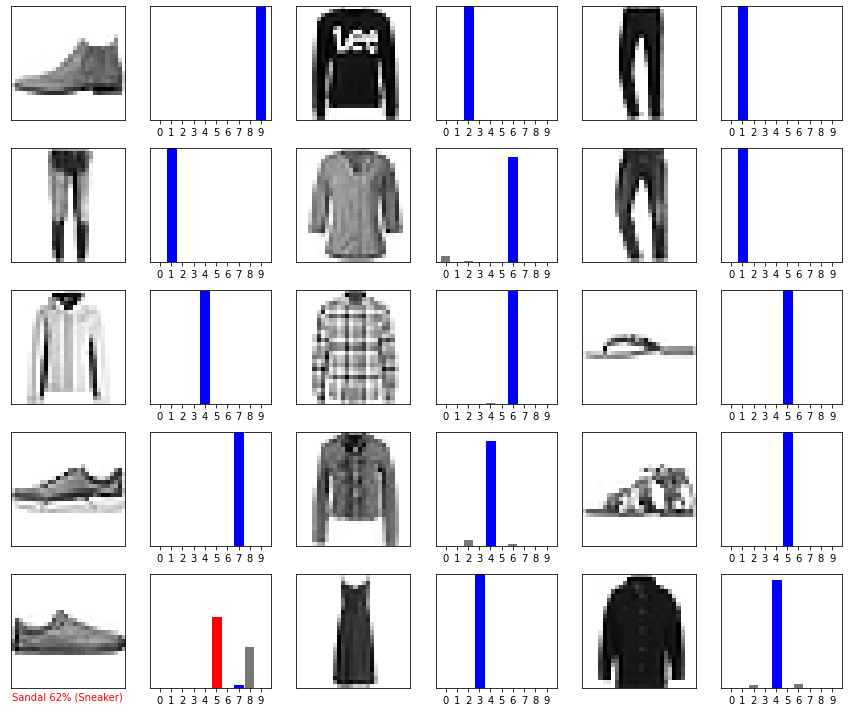

In [84]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

